# HW 
- Use the cancer data used below (or the first two columns of the iris data set) - for bonus, bring your own data set
- Normalize, test-train split the data
- Train models from SVM (linear and rbf kernels), LogRegression (2 values of C), KNN (3 neighbor values)
- Create two tables, one for train, one for test - that represent the Model, description, Precision, Recall, f1 score on each line
- Pick one of the Models and show the feature importance

In [58]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn.preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets, svm, neighbors
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.neighbors import KNeighborsClassifier as KNN

In [59]:
cancer = pd.read_csv('../data/wdbc.data.txt', header=None)

In [60]:
y = (cancer[1]=='M').astype(int)
X = cancer[[*range(2,31)]]
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

In [76]:
model = svm.SVC(kernel='linear').fit(X_train, y_train)

precision0,recall0,fscore0,support0 = score(y_train,model.predict(X_train))
precision0a,recall0a,fscore0a,support0a = score(y_test,model.predict(X_test))

In [65]:
model = svm.SVC(kernel='rbf').fit(X_train, y_train)

precision1,recall1,fscore1,support1 = score(y_train,model.predict(X_train))
precision1a,recall1a,fscore1a,support1a = score(y_test,model.predict(X_test))

In [66]:
model = LogReg(C=5).fit(X_train, y_train)

precision2,recall2,fscore2,support2 = score(y_train,model.predict(X_train))
precision2a,recall2a,fscore2a,support2a = score(y_test,model.predict(X_test))

In [67]:
model = LogReg(C=10).fit(X_train, y_train)

precision3,recall3,fscore3,support3 = score(y_train,model.predict(X_train))
precision3a,recall3a,fscore3a,support3a = score(y_test,model.predict(X_test))

In [70]:
model= KNN(n_neighbors=2).fit(X_train, y_train) 

precision4,recall4,fscore4,support4 = score(y_train,model.predict(X_train)) 
precision4a,recall4a,fscore4a,support4a = score(y_test,model.predict(X_test))

In [71]:
model= KNN(n_neighbors=5).fit(X_train, y_train) 

precision5,recall5,fscore5,support5 = score(y_train,model.predict(X_train))
precision5a,recall5a,fscore5a,support5a = score(y_test,model.predict(X_test))

In [72]:
model= KNN(n_neighbors=10).fit(X_train, y_train) 

precision6,recall6,fscore6,support6 = score(y_train,model.predict(X_train)) 
precision6a,recall6a,fscore6a,support6a = score(y_test,model.predict(X_test))

In [73]:
MTrain = pd.DataFrame({'Model':['SVM', 'SVM', 'LogReg', 'LogReg', 'KNN', 'KNN', 'KNN']})

DTrain = pd.DataFrame({'Description':['Linear', 'RBF', 'C = 5', 'C = 10', 'V = 2', 'V = 5', 'V = 10']})

PTrain = pd.DataFrame({'Precision':[np.mean(precision0), np.mean(precision1) , np.mean(precision2) , np.mean(precision3)
                                     , np.mean(precision4), np.mean(precision5), np.mean(precision6)]})

RTrain = pd.DataFrame({'Recall':[np.mean(recall0), np.mean(recall1) , np.mean(recall2) , np.mean(recall3)
                                 , np.mean(recall4), np.mean(recall5), np.mean(recall6)]})

FTrain = pd.DataFrame({'F1 Score':[np.mean(fscore0), np.mean(fscore1) , np.mean(fscore2) , np.mean(fscore3)
                                     , np.mean(fscore4), np.mean(fscore5), np.mean(fscore6)]})

MTrain.join(DTrain).join(PTrain).join(RTrain).join(FTrain)

,Model,Description,Precision,Recall,F1 Score
0,SVM,Linear,0.975309,0.944444,0.957930
1,SVM,RBF,0.942529,0.861111,0.888867
2,LogReg,C = 5,0.981250,0.958333,0.968707
3,LogReg,C = 10,0.981250,0.958333,0.968707
4,KNN,V = 2,0.969512,0.930556,0.946963
5,KNN,V = 5,0.969512,0.930556,0.946963
6,KNN,V = 10,0.963855,0.916667,0.935795


In [74]:
MTest = pd.DataFrame({'Model':['SVM', 'SVM', 'LogReg', 'LogReg', 'KNN', 'KNN', 'KNN']})

DTest = pd.DataFrame({'Description':['Linear', 'RBF', 'C = 5', 'C = 10', 'V = 2', 'V = 5', 'V = 10']})

PTest = pd.DataFrame({'Precision':[np.mean(precision0a), np.mean(precision1a) , np.mean(precision2a) , 
                                   np.mean(precision3a), np.mean(precision4a), np.mean(precision5a), 
                                   np.mean(precision6a)]})

RTest = pd.DataFrame({'Recall':[np.mean(recall0a), np.mean(recall1a) , np.mean(recall2a) , np.mean(recall3a)
                                 , np.mean(recall4a), np.mean(recall5a), np.mean(recall6a)]})

FTest = pd.DataFrame({'F1 Score':[np.mean(fscore0a), np.mean(fscore1a) , np.mean(fscore2a) , np.mean(fscore3a)
                                     , np.mean(fscore4a), np.mean(fscore5a), np.mean(fscore6a)]})

MTest.join(DTest).join(PTest).join(RTest).join(FTest)

,Model,Description,Precision,Recall,F1 Score
0,SVM,Linear,0.942614,0.912256,0.923616
1,SVM,RBF,0.911765,0.829545,0.848873
2,LogReg,C = 5,0.948869,0.923620,0.933521
3,LogReg,C = 10,0.955271,0.934984,0.943311
4,KNN,V = 2,0.941640,0.894886,0.910282
5,KNN,V = 5,0.941538,0.905519,0.918391
6,KNN,V = 10,0.933654,0.884578,0.900281


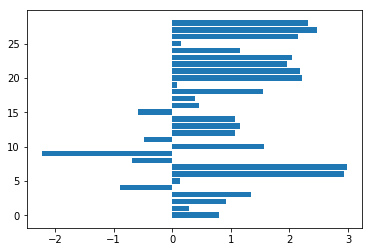

array([ 0.79959938,  0.28024895,  0.90971689,  1.33703638, -0.89404277,
        0.13317471,  2.93508534,  2.97564258, -0.69314126, -2.22273632,
        1.56110066, -0.47790517,  1.06607849,  1.15383118,  1.06407188,
       -0.58608688,  0.4637289 ,  0.38398343,  1.54707179,  0.07458848,
        2.21160044,  2.17277151,  1.96186589,  2.04539866,  1.16001354,
        0.14500122,  2.1427729 ,  2.4686188 ,  2.31836036])

In [85]:
model = LogReg(C=10).fit(X_train, y_train)
coef = model.coef_[0]
plt.barh(list(range(coef.shape[0])), coef, align='center')
plt.show()

coef

Concavity and Concave Points are the features have the most influence in this model.

Ten real-valued features are computed for each cell nucleus:
	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)